In [1]:
import pandas as pd

df=pd.read_csv('MSFT.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-18,243.240005,243.929993,235.369995,238.500000,236.217941,26329600
1,2022-10-19,237.039993,239.610001,234.289993,236.479996,234.217270,19985700
2,2022-10-20,235.770004,241.309998,234.869995,236.149994,233.890442,21811000
3,2022-10-21,234.740005,243.000000,234.500000,242.119995,239.803299,26299700
4,2022-10-24,243.759995,247.839996,241.300003,247.250000,244.884232,24911200
...,...,...,...,...,...,...,...
246,2023-10-11,331.209991,332.820007,329.140015,332.420013,332.420013,20063200
247,2023-10-12,330.570007,333.630005,328.720001,331.160004,331.160004,19313100
248,2023-10-13,332.380005,333.829987,326.359985,327.730011,327.730011,21072400
249,2023-10-16,331.049988,336.140015,330.600006,332.640015,332.640015,22158000


In [5]:
df=df[['Date','Close']]
df

,Date,Close
0,2022-10-18,238.500000
1,2022-10-19,236.479996
2,2022-10-20,236.149994
3,2022-10-21,242.119995
4,2022-10-24,247.250000
...,...,...
246,2023-10-11,332.420013
247,2023-10-12,331.160004
248,2023-10-13,327.730011
249,2023-10-16,332.640015


In [6]:
df['Date']

0      2022-10-18
1      2022-10-19
2      2022-10-20
3      2022-10-21
4      2022-10-24
          ...    
246    2023-10-11
247    2023-10-12
248    2023-10-13
249    2023-10-16
250    2023-10-17
Name: Date, Length: 251, dtype: object

In [11]:
import datetime

def str_to_datetime(s):
    split=s.split('-')
    year,month,day=int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year,month=month,day=day)
datetime_object=str_to_datetime('1986-10-8')
datetime_object


datetime.datetime(1986, 10, 8, 0, 0)

In [12]:
df['Date']=df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\asus\AppData\Local\Temp\ipykernel_15416\1876721881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']=df['Date'].apply(str_to_datetime)


0     2022-10-18
1     2022-10-19
2     2022-10-20
3     2022-10-21
4     2022-10-24
         ...    
246   2023-10-11
247   2023-10-12
248   2023-10-13
249   2023-10-16
250   2023-10-17
Name: Date, Length: 251, dtype: datetime64[ns]

In [14]:
df.index=df.pop('Date')
df

,Close
Date,
2022-10-18,238.500000
2022-10-19,236.479996
2022-10-20,236.149994
2022-10-21,242.119995
2022-10-24,247.250000
...,...
2023-10-11,332.420013
2023-10-12,331.160004
2023-10-13,327.730011


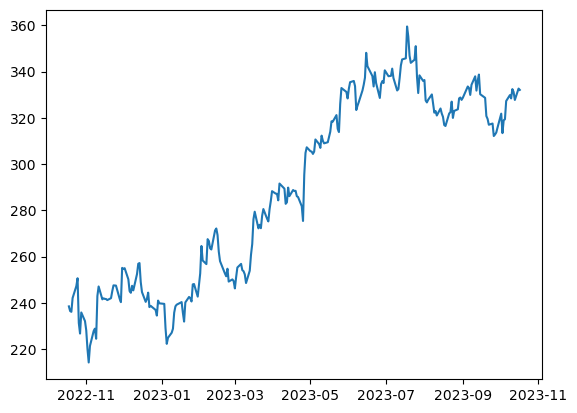

In [16]:
import matplotlib.pyplot as plt

plt.plot(df.index,df['Close'])

In [26]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2022-10-21', 
                                '2023-10-17', 
                                n=3)
windowed_df
    

,Target Date,Target-3,Target-2,Target-1,Target
0,2022-10-21,238.500000,236.479996,236.149994,242.119995
1,2022-10-24,236.479996,236.149994,242.119995,247.250000
2,2022-10-25,236.149994,242.119995,247.250000,250.660004
3,2022-10-26,242.119995,247.250000,250.660004,231.320007
4,2022-10-27,247.250000,250.660004,231.320007,226.750000
...,...,...,...,...,...
243,2023-10-11,327.260010,329.820007,328.390015,332.420013
244,2023-10-12,329.820007,328.390015,332.420013,331.160004
245,2023-10-13,328.390015,332.420013,331.160004,327.730011
246,2023-10-16,332.420013,331.160004,327.730011,332.640015


In [27]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((248,), (248, 3, 1), (248,))

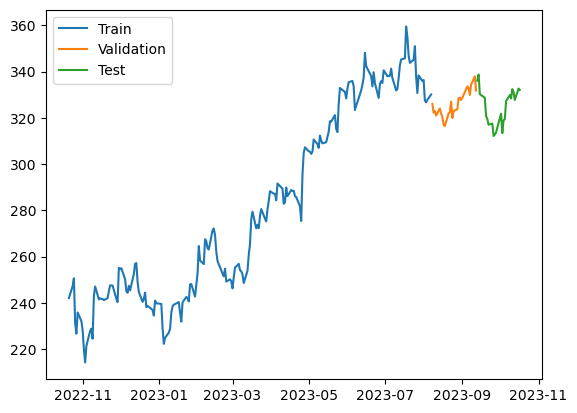

In [28]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [33]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 5s 160ms/step - loss: 80027.6094 - mean_absolute_error: 280.0545 - val_loss: 105660.1562 - val_mean_absolute_error: 325.0084
Epoch 2/100
7/7 [==============================] - 0s 15ms/step - loss: 79792.4141 - mean_absolute_error: 279.6316 - val_loss: 105468.9766 - val_mean_absolute_error: 324.7142
Epoch 3/100
7/7 [==============================] - 0s 14ms/step - loss: 79611.1250 - mean_absolute_error: 279.3057 - val_loss: 105217.0234 - val_mean_absolute_error: 324.3260
Epoch 4/100
7/7 [==============================] - 0s 12ms/step - loss: 79365.9531 - mean_absolute_error: 278.8673 - val_loss: 104877.2109 - val_mean_absolute_error: 323.8017
Epoch 5/100
7/7 [==============================] - 0s 13ms/step - loss: 79044.0469 - mean_absolute_error: 278.2875 - val_loss: 104432.6328 - val_mean_absolute_error: 323.1144
Epoch 6/100
7/7 [==============================] - 0s 15ms/step - loss: 78584.5156 - mean_absolute_error: 277.4538 - val_los

Epoch 97/100
7/7 [==============================] - 0s 15ms/step - loss: 34.3781 - mean_absolute_error: 4.5689 - val_loss: 58.5321 - val_mean_absolute_error: 6.8581
Epoch 98/100
7/7 [==============================] - 0s 16ms/step - loss: 51.0401 - mean_absolute_error: 5.6272 - val_loss: 51.7023 - val_mean_absolute_error: 6.3832
Epoch 99/100
7/7 [==============================] - 0s 34ms/step - loss: 60.4252 - mean_absolute_error: 6.4172 - val_loss: 25.9104 - val_mean_absolute_error: 4.2908
Epoch 100/100
7/7 [==============================] - 0s 15ms/step - loss: 57.7390 - mean_absolute_error: 6.0304 - val_loss: 86.0517 - val_mean_absolute_error: 8.5573


7/7 [==============================] - 1s 4ms/step


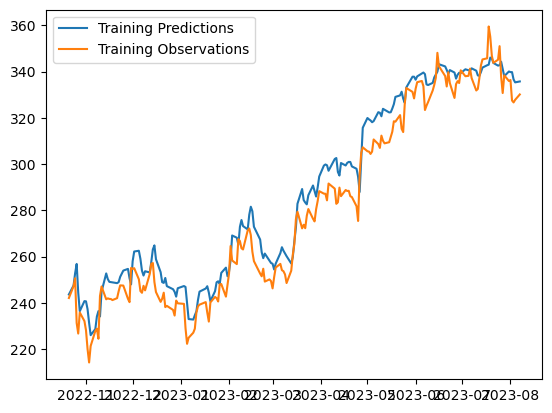

In [34]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 37ms/step


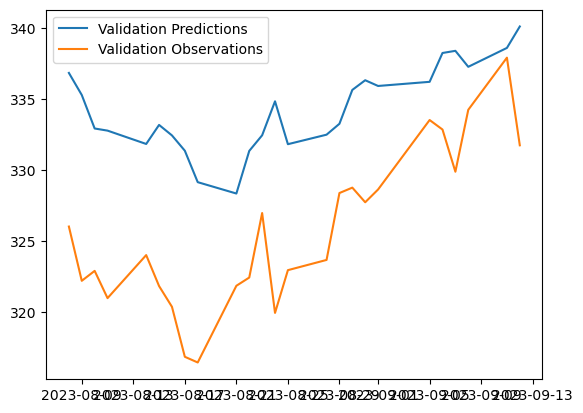

In [35]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 35ms/step


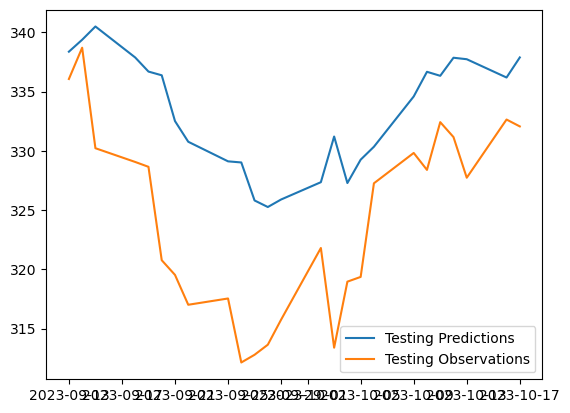

In [36]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

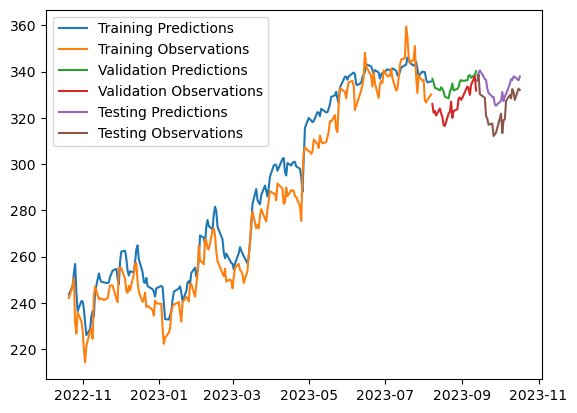

In [37]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [38]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 38ms/step


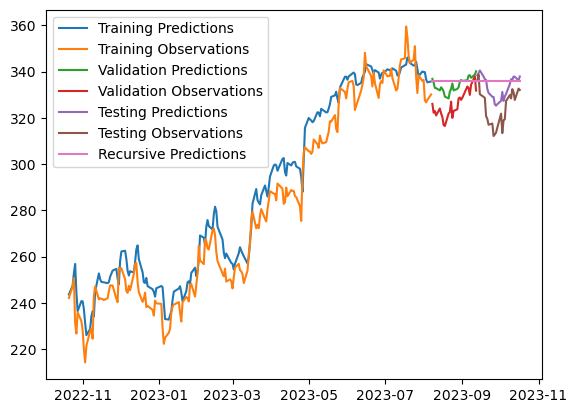

In [39]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])